# SyriaTel Communications Project: Customer Churn (Binary Classification)

### Table of Contents

1. Introduction + Cleaning + EDA: Exploration of the data without intensive technologies. 
2. Modeling the Data
3. Question One
4. Question Two
5. Question Three
6. Conclusion: The findings repeated in a concise summary.

### Strategic Approach

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

## Business Understanding

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size (3333 rows of data), the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.


### The Problem

The problem, put forth by SyriaTel, is that they have a customer churn rate in their dataset of nearly 14.5%. An acceptable churn rate is 5-7% annually. Therefore, the true problem to solve with this dataset is to understand the features affecting customer churn, and to what degree. This will empower SyriaTel with the knowledge to lower customer churn by at least 7%.

This is a binary classification problem. 

It is more expensive to find new customers than to retain current customers. Therefore, when considering solutions for this problem, expenses of solutions should be considered. 

### Null Hypothesis

There is no significant differences between the populations of customers who are churning and customers who are not churning. 

### Customer Churn Reduction Strategies:


- Offer Incentives: Regarded as the most effective
- Targeting Correct Audience
- Providing Better Service
- Understanding Complaints and Solving at the Source: 96% of unhappy customers don't complain. 91% of those customers just leave and dont come back. 
- Use your best Sales People on Retention
- Flaunt Competitive Advantages
- Offer Long Term Contracts
- Analyzing Cause of Churn
- Engaging with Customers (Relationship Marketing)
- Customer Education (Training)
- Identify Customer Risk Factors
- Define Most Valuable Customers
- Segment Customers: Customers can be segmented into groups of 
     - Profitablity
     - Readiness to Leave
     - Likelihood to Positively Respond to Offer
     


### Questions to Answer

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

### Customer Experience

SyriaTel is a phone provider. Understanding the pain points of the customer experience is essential. Some of the factors that SyriaTel should take into consideration as they approach the findings of the data are:
 - Monthly Costs
 - Network Strength
 - Costs of Contract Initiation
 - Costs of Contract Cancellation
 - SyriaTel Costs v. Competition Costs by Region
 - Any Customer Interaction Via Employees or Ads
 - Obstacles of Internal/External Troubleshooting
 - Transparency for customers in Usage to Cost Relationship
 - Unexpected Charges (Potentially from International Calls without an International Plan)

## Data Understanding

The data has been provided by Kaggle. Details on the units for the account length feature can be pulled from other sources. 

The target will be the churn feature. Other features may be added to the df to better predict churn. 

There is enough data to build a model for SyriaTel to analyze their customer churn at this specific point in time. However, more data would be needed for a more robust model. 

### Importing Relevant Packages

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools
from imblearn.over_sampling import SMOTE, ADASYN
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px


### Optional: Avoiding Truncating

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

### Loading Data

In the data, the retained customers were listed as 'False' in the column called 'churn' while the churned customers were listed as 'True'

In [3]:
df = pd.read_csv('data/Kaggle_Customer_Churn_Dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Number of Rows and Columns

In [4]:
df.shape

(3333, 21)

### Number of Elements in Dataframe

In [5]:
df.size

69993

### Churners versus Non-Churners

Some class imbalance is evident with 85% of the churn column being 'False' and 15% of the churn column being 'True'. However, since it is not more imbalanced than a ratio of 10 to 1, SMOTE or another technique to treat class imbalance won't be used.

In [6]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Looking at the column data types, it is evident that area code should not be incorporated as an integer since its value is in location significance rather than the significance of a numerical value. 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

## Data Assumptions

- All of the data was captured at one point in time.
- The data represents a bill over a one month duration.
- Each row represents a unique phone number. (Confirmed in Data Preparation)
- Each phone number represents one account.
- The company is charging in dollars.
- Account length is in terms of months.
- The location of the customer is in the state listed, not based on the area code.

## Data Preparation

### Viewing the Data

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Viewing Value Counts for Churn

In [9]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

### Inspecting the Data for NaN Values

No NaN values are present in the data. 

In [10]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Observing Column Titles

In [11]:
df.columns

Index(['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

### Renaming Column Titles to Remove Spaces

In [12]:
df.rename(columns={'account length':'account_length', 'area code': 'area_code', 'phone number': 'phone_number', 'international plan': 'intl_plan', 'voice mail plan': 'vmail_plan', 'number vmail messages': 'qty_vmails', 'total day minutes':'sum_day_mins','total day calls':'sum_day_calls', 'total day charge':'total_day_charge', 'total eve minutes':'sum_eve_mins', 'total eve calls': 'sum_eve_calls', 'total eve charge': 'total_eve_charge', 'total night minutes':'sum_night_mins', 'total night calls':'sum_night_calls', 'total night charge': 'total_night_charge', 'total intl minutes':'sum_intl_mins', 'total intl calls': 'sum_intl_calls', 'total intl charge': 'total_intl_charge', 'customer service calls': 'cust_serv_calls'}, inplace = True)

### Inspecting New Column Titles

In [13]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan', 'vmail_plan', 'qty_vmails', 'sum_day_mins', 'sum_day_calls',
       'total_day_charge', 'sum_eve_mins', 'sum_eve_calls', 'total_eve_charge', 'sum_night_mins', 'sum_night_calls', 'total_night_charge',
       'sum_intl_mins', 'sum_intl_calls', 'total_intl_charge', 'cust_serv_calls', 'churn'],
      dtype='object')

### Inspecting Column Atributes

In [14]:
df.describe()

,account_length,area_code,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Confirming Uniqueness of Phone Numbers

Each row represents one phone line.

In [15]:
df.phone_number.nunique()


3333

### Looking at Value Counts for Voicemail

The first number is the quantity of voicemails. The second number is the number of people who have that quantity of voicemails. For example, the number of people with zero voicemails is 2411.

In [16]:
df.qty_vmails.value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: qty_vmails, dtype: int64

### Looking at Value Counts for Account Length

One can assume that the account length is in terms of months. Ultimately this would need to be confirmed with the company.

In [17]:
#Remove Truncation

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 150)

In [18]:
df.account_length.value_counts().sort_index()

1      8
2      1
3      5
4      1
5      1
      ..
221    1
224    2
225    2
232    1
243    1
Name: account_length, Length: 212, dtype: int64

### Average Account Length: 8.5 Years

The average account length is 101 months or roughly 8.5 years. This is likely why the mystery of the reasons behind churn is crucial to discover; Because the average customer is providing immense value with likely low monthly cost. 

In [19]:
df.account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

### Area Code is Misleading. 

All of the area codes are zoned to California. However, the states listed are assumed to be the true location of the customer. 

In [20]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

In [21]:
df.intl_plan.value_counts()

no     3010
yes     323
Name: intl_plan, dtype: int64

### Dropping the Phone Number and Area Code Feature

In [22]:
df.drop(columns=['phone_number', 'area_code'], inplace = True)

### Replace False and No with Zero

In [23]:
df.replace(False, 0, inplace = True)
df.replace('no', 0, inplace = True)

### Replace True and Yes with One

In [24]:
df.replace(True, 1, inplace = True)
df.replace('yes', 1, inplace = True)

In [25]:
df.head()

,state,account_length,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0


### Addressing States

In [41]:
state_df = df[['state', 'churn']]

In [35]:
state_df = state_df.groupby('state')

In [94]:
state_df_churn = state_df[state_df['churn'] == True]

In [97]:
state_df_churn.head()

,state,churn,zero
10,IN,1.0,0
15,NY,1.0,0
21,CO,1.0,0
33,AZ,1.0,0
41,MD,1.0,0


In [44]:
state_df_stay = state_df[state_df['churn'] == False]

In [45]:
state_df_stay.head()

,state,churn
0,KS,0.0
1,OH,0.0
2,NJ,0.0
3,OH,0.0
4,OK,0.0


In [98]:
state_df_churn = state_df_churn.groupby(['state'])['churn'].count()

In [99]:
state_df_churn.head(25)

state
AK     3
AL     8
AR    11
AZ     4
CA     9
CO     9
CT    12
DC     5
DE     9
FL     8
GA     8
HI     3
IA     3
ID     9
IL     5
IN     9
KS    13
KY     8
LA     4
MA    11
MD    17
ME    13
MI    16
MN    15
MO     7
Name: churn, dtype: int64

In [100]:
state_df_stay = state_df_stay.groupby(['state'])['churn'].count()

In [101]:
state_df_stay.head(25)

state
AK    49
AL    72
AR    44
AZ    60
CA    25
CO    57
CT    62
DC    49
DE    52
FL    55
GA    46
HI    50
IA    41
ID    64
IL    53
IN    62
KS    57
KY    51
LA    47
MA    54
MD    53
ME    49
MI    57
MN    69
MO    56
Name: churn, dtype: int64

In [104]:
new_df = state_df_stay.to_frame().join(state_df_churn, on='state', lsuffix='L')


churnL is the column that did not churn.

In [105]:
new_df.head()

,churnL,churn
state,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9


In [106]:
new_df = new_df.reset_index()

In [107]:
new_df.head()

,state,churnL,churn
0,AK,49,3
1,AL,72,8
2,AR,44,11
3,AZ,60,4
4,CA,25,9


In [109]:
new_df = new_df.rename(columns = {'churnL':'not_churn'})

In [110]:
new_df.head()

,state,not_churn,churn
0,AK,49,3
1,AL,72,8
2,AR,44,11
3,AZ,60,4
4,CA,25,9


In [113]:
new_df['rate'] = (new_df['churn'] / new_df['not_churn']) * 100

In [114]:
new_df.head()

,state,not_churn,churn,rate
0,AK,49,3,6.122449
1,AL,72,8,11.111111
2,AR,44,11,25.000000
3,AZ,60,4,6.666667
4,CA,25,9,36.000000


### Viewing Geographic Significance

As SyriaTel takes action toward mitigating churn, they may decide that a good strategy is to first target states with the highest churn rate.

In [122]:
fig = px.choropleth(new_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='rate',
                    color_continuous_scale="pinkyl",
                    title = 'Churn Rate By State'
                
                    )
fig.show()







### Dropping the States


The states that are churning the most don't seem to have anything obviously in common so the state column can be dropped as . Churn rate by state could be useful for future work. 

In [26]:
df_one = df[df['churn'] == 1]
df_zero = df[df['churn'] == 0]

In [162]:
df_one.head()

,state,account_length,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls,churn
10,IN,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1.0
15,NY,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1.0
21,CO,77,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1.0
33,AZ,12,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1.0
41,MD,135,1,1,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1.0


In [27]:
df_one.state.value_counts()

NJ    18
TX    18
MD    17
MI    16
MN    15
      ..
LA     4
AZ     4
IA     3
AK     3
HI     3
Name: state, Length: 51, dtype: int64

In [28]:
df_zero.state.value_counts()

WV    96
AL    72
VA    72
WI    71
MN    69
      ..
GA    46
AR    44
IA    41
PA    37
CA    25
Name: state, Length: 51, dtype: int64

In [29]:
df = df.drop(columns = 'state')

### Feature Engineering: Monthly Charge

The new feature 'monthly_charge is the sum of the charges within the month.

In [30]:
df['monthly_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge'])


# Space intentionally left for scrolling.

The average monthly charge is 59.47 while the maximum is 96.15 and the minimum is 22.93.

In [31]:
df.monthly_charge.describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: monthly_charge, dtype: float64

### Feature Engineering: Total Charge

The new feature 'total_charge' is the total revenue by customer for the entirety of the relationship of the customer. It was constructed by adding the monthly charges and multiplying by the account length.

In [32]:
df['total_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']) * df['account_length']

In [33]:
df.total_charge.describe()

count     3333.000000
mean      6008.885668
std       2627.457674
min         45.420000
25%       4138.880000
50%       5785.700000
75%       7750.260000
max      16966.560000
Name: total_charge, dtype: float64

### Finding Lifetime Total Revenue

The total lifetime revenue from customer charges is roughly $20,000,000.

In [34]:
df.total_charge.sum()

20027615.93

### Finding Revenue of This Month

In [35]:
df.monthly_charge.sum()

198146.03

### Revenue of Cancelled Customers

Revenue of customers who are cancelling.

In [36]:
df_stay = df[['monthly_charge', 'churn']].copy()  

In [37]:
 df_stay = df_stay[df_stay.churn != False]

In [38]:
df_stay.monthly_charge.sum()

31566.93

### Calculating the Percent of Monthly Revenue Lost This Month

Nearly 16 percent of revenue will be gone this month as a result of churn! 

In [39]:
percent_lost = (31566.93 / 198146.03) * 100
percent_lost

15.931144318157674

### Summarization of Class Distribution

1 represents the customers who are cancelling.

In [40]:
df.churn.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

### Depicting Nature of Class Imbalance

df_true represents where customer churn is True.

In [41]:
df_true =  df[df.churn == 1.0]
df_true.shape

(483, 20)

In [42]:
df_false =  df[df.churn == 0.0]
df_false.shape

(2850, 20)

In [43]:
df_true.churn.value_counts() 

1.0    483
Name: churn, dtype: int64

In [44]:
df_false.churn.value_counts()

0.0    2850
Name: churn, dtype: int64

### Scatter Plot of Total Customer Spend Over Time

You can see a line of cancelling customers above the staying ones, indicating higher spend for some cancelling customers.

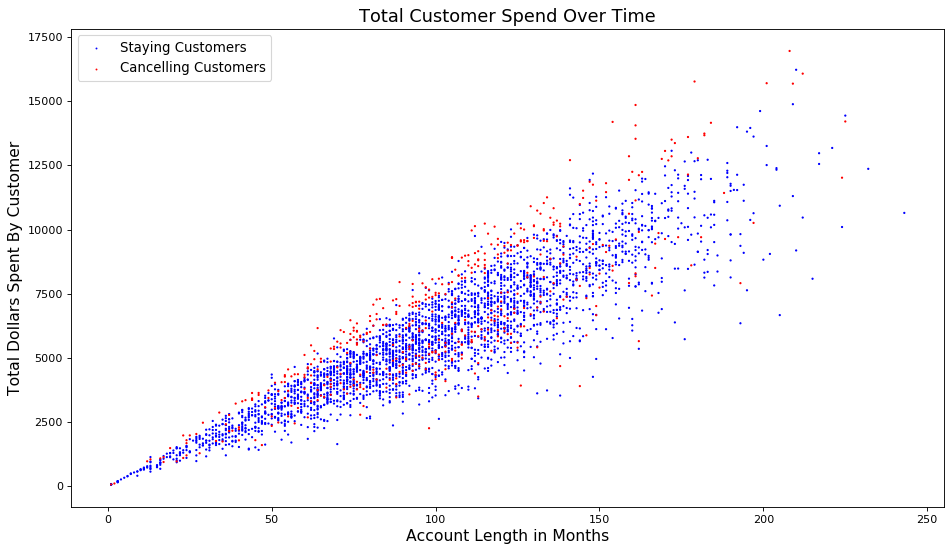

In [45]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(df.account_length, df.total_charge, df.churn == 0, c="blue", label = 'Staying Customers')
plt.scatter(df.account_length, df.total_charge, df.churn == 1, c="red", label = 'Cancelling Customers')
plt.title("Total Customer Spend Over Time", fontsize = 16)
plt.xlabel("Account Length in Months", fontsize = 14)
plt.ylabel("Total Dollars Spent By Customer", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'center')
plt.legend(fontsize= 12)
plt.tight_layout()
plt.show()

# Test for Multicollinearity with Variance Inflation Factor (VIF)

Commentary on Multicollinearity. 

In [46]:
# the independent variables set
X = df.drop(columns = 'churn')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["churn"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 churn           VIF
0       account_length  9.781479e+01
1            intl_plan  1.116501e+00
2           vmail_plan  1.646309e+01
3           qty_vmails  1.607613e+01
4         sum_day_mins  1.246650e+08
5        sum_day_calls  2.457502e+01
6     total_day_charge           inf
7         sum_eve_mins  3.738612e+07
8        sum_eve_calls  2.432564e+01
9     total_eve_charge           inf
10      sum_night_mins  1.072023e+07
11     sum_night_calls  2.542757e+01
12  total_night_charge           inf
13       sum_intl_mins  9.981259e+05
14      sum_intl_calls  4.298029e+00
15   total_intl_charge           inf
16     cust_serv_calls  2.394943e+00
17      monthly_charge           inf
18        total_charge  1.016221e+02


### Removing Columns

The action that the customer took that is measured in terms of charge is most likely the number of minutes. Several other columns are showing high levels of multicolinearity. This is likely because more calls equate to more minutes and also because more minutes means a higher charge.

For this specific business case we should look to the total charge because that is likely the prominent determinant of churn. For that reason, we can eliminate features that include calls and minutes. 


In [47]:
df = df.drop(columns = ['total_charge', 'account_length', 'sum_day_calls', 'sum_day_mins', 'vmail_plan','total_day_charge' , 'total_eve_charge','total_night_charge', 'total_intl_charge', 'sum_eve_mins', 'sum_night_mins', 'sum_intl_mins' , 'sum_eve_calls', 'sum_night_calls', 'sum_intl_calls'])


#Intentionally left blank for scrolling

Another test can be run to look for additional multicolinearity.

In [48]:
# the independent variables set
X = df.drop(columns = 'churn')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vdf = pd.DataFrame(vif_data)

In [49]:
vdf.head()

,features,VIF
0,intl_plan,1.110397
1,qty_vmails,1.338848
2,cust_serv_calls,2.296434
3,monthly_charge,2.746185


### The DataFrame can be Pickled and Used in the Next Notebook

In [ ]:
pickle the df you need for modelling

In [ ]:
pickle the map df

In [ ]:
original_df.to_pickle("./dummy.pkl")  

### Future 